## Classification Metrics
* Classification Accuracy
* Logarithmic Loss
* Area Under ROC Curve
* Confusion Matrix
* Classification Report

### Classification Accuracy

* Classification Accurayc = `# of correct predictions / all predictions made`
* More suitable when there are an equal number of observations in each class, and when all predictions and prediction errors are equally important

In [3]:
# cross validation classification accuracy
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("diabetes.csv")

X = data.values[:,0:8]
Y = data.values[:,8]

kfold = KFold(n_splits = 10, random_state =7)
model = LogisticRegression()
scoring = "accuracy"

results = cross_val_score(model, X, Y, cv=kfold, scoring = scoring)
print("Accuracy:  %.3f (%.3f)" % (results.mean(),results.std()))

Accuracy:  0.770 (0.048)


### Logarithmic Loss (Logloss)

* Probability between 0 and 1 is a measure of confidence for a prediction by an algorithm. 
* Smaller logloss = better performance. 
* 0 = perfect score

* Smaller logloss is better with 0 representing a perfect logloss. As mentioned above, the measure is inverted to be ascending when using the cross_val_score() function. The actual logloss is simply the positive version of the number.SK-Learn's unified scoring API always maximises the score, so scores which need to be minimised are negated (made negative) in order for the unified scoring API to work correctly. The score that is returned is therefore negated when it is a score that should be minimised and left positive if it is a score that should be maximised.

In [5]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("diabetes.csv")

X = data.values[:,0:8]
Y = data.values[:,8]

kfold = KFold(n_splits = 10, random_state =7)
model = LogisticRegression()
scoring = "neg_log_loss"
results = cross_val_score(model, X, Y, cv=kfold, scoring = scoring)
print("Accuracy:  %.3f (%.3f)" % (results.mean(),results.std()))

Accuracy:  -0.493 (0.047)


### Area Under ROC Curve (AUC)

* Measures performance for binary classification problems
* Represents a model's ability to discriminate between positive and negative classes
* An area of 1 represents a model that made all predictions perfectly
* An area of 0.5 represents a model that is as good as random
* **Sensitivity** is the true positive rate, also known as **recall**. It is the number of instances from positive class that are actualy predicted correctly. True Positive Rate = True Positive / (True Positive + False Negative)
* **Specificity** is the true negative rate. It is the number of instances from the negative class that are actually predicted correctly. False Positive Rate = False Postivie / (False Positive + True Negative)

ROC Curve demonstrates:
* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
* The slope of the tangent line at a cutpoint gives the likelihood ratio (LR) for that value of the test.
* The area under the curve = measure of test accuracy.
* An area of 1 represents a perfect test; an area of .5 represents a worthless test. A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:

    + 1) .90-1 = excellent (A)

    + 2) .80-.90 = good (B)

    + 3) .70-.80 = fair (C)

    + 4) .60-.70 = poor (D)

    + 5) .50-.60 = fail (F)


AUC: 0.808


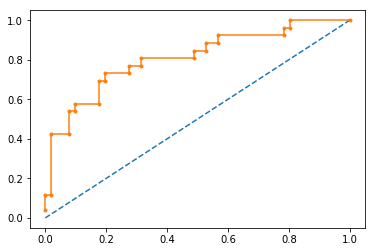

Accuracy:  0.824 (0.041)


In [10]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

data = pd.read_csv("diabetes.csv")

X = data.values[:,0:8]
Y = data.values[:,8]

trainX, testX, trainy, testy = train_test_split(X, Y, test_size=0.1, random_state=2)

kfold = KFold(n_splits = 10, random_state =7)
model = LogisticRegression()
model.fit(trainX,trainy)
probs = model.predict_proba(testX)
# keep the probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(testy,probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

scoring = "roc_auc"
results = cross_val_score(model, X, Y, cv=kfold, scoring = scoring)
print("Accuracy:  %.3f (%.3f)" % (results.mean(),results.std()))

We can plot a ROC curve for a model in Python using the `𝑟𝑜𝑐_𝑐𝑢𝑟𝑣𝑒()` scikit-learn function. The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. The function returns the false positive rates for each threshold, true positive rates for each threshold and thresholds. The AUC for the ROC can be calculated using the `𝑟𝑜𝑐_𝑎𝑢𝑐_𝑠𝑐𝑜𝑟𝑒()` function. Like the `𝑟𝑜𝑐_𝑐𝑢𝑟𝑣𝑒()` function, the AUC function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. It returns the AUC score between 0.0 and 1.0 for no skill and perfect skill respectively.

### Confusion Matrix
* Useful to show accuracy of a model with two or more classes

In [13]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

data = pd.read_csv("diabetes.csv")

X = data.values[:,0:8]
Y = data.values[:,8]

test_size=0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression() 
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

matrix = confusion_matrix(Y_test, predicted) 
print(matrix)

[[141  21]
 [ 41  51]]


### Classification Report 
`classification_report()` function in scikit-learn gives precision, recall, F1-score and support for each class

In [14]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

data = pd.read_csv("diabetes.csv")

X = data.values[:,0:8]
Y = data.values[:,8]

test_size=0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression() 
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

        0.0       0.77      0.87      0.82       162
        1.0       0.71      0.55      0.62        92

avg / total       0.75      0.76      0.75       254



## Shortlisting Algorithms

* Logistic Regression
* k-Nearest Neighbors
* Classification and Regression Trees (CART)
* Support Vector Machines

**Logistic Regression** `LogisticRegression` 

Logistic regression assumes a **Gaussian distribution** (which requires normalisation) for the numeric input variables and can model binary classification problems. 

In [16]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

data = pd.read_csv("diabetes.csv")

X = data.values[:,0:8]
Y = data.values[:,8]

test_size=0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

        0.0       0.77      0.87      0.82       162
        1.0       0.71      0.55      0.62        92

avg / total       0.75      0.76      0.75       254



**k-Nearest Neighbors (KNN)** `KNeighborsClassifier`

KNN uses a distance metric to find the k most similar instances in the training data for a new instance and takes the mean outcome of the neighbors as the prediction.

In [19]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("diabetes.csv")

X = data.values[:,0:8]
Y = data.values[:,8]

num_folds = 10

kfold = KFold(n_splits = 10, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7265550239234451


### Support Vector Machine (SVM) `SVC`

SVM seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes. Of particular importance is the use of different kernel functions via the kernel parameter. A powerful Radial Basis Function is used by default. 

In [20]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

data = pd.read_csv("diabetes.csv")

X = data.values[:,0:8]
Y = data.values[:,8]

num_folds = 10

kfold = KFold(n_splits = 10, random_state=7)
model = SVC()

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.6510252904989747


### Classification and Regression Trees (CART)  `DecisionTreeClassifier`

CART constructs a binary tree from the training data. Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimize a cost function (like the Gini index).